## Sales Forecasting using Walmart data set.

<img width="450" align="left" src="https://miro.medium.com/max/2760/1*gsUixexI9DsFfKsS-ZZqng.png">

Sales forecast is an indicator of a product quantity that is likely to be sold in a time period in a specified market at given price. In other words, accurate sales forecasting enables a company to produce the required quantity at the right time in order to meet the future demand. [1]

In this project, I used a machine learning approach to forecast sales for each of 45 Walmart stores based on [Walmart data set](https://github.com/apadhye90/data-mining/tree/master/Kaggle%20Dataset) [2]


> [1] [Sales Forecasting: Meaning, Importance and Methods](https://www.businessmanagementideas.com/sales/forecasting-sales/sales-forecasting-meaning-importance-and-methods/7122)
<br>
[2] [Walmart Recruiting - Store Sales Forecasting: Overview](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)

<br>

### Table of Contents

<br>

### General Setup
___

In [1]:
# Dataframes.
import pandas as pd

# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Change style and size of plots
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (13, 9)
plt.rcParams["figure.titlesize"] = 16

<br>

### Exploratory Data Analysis.
___

The data set consists of 4 csv files: stores, train, test, features. [3] First, I will analyse them separately. [4]

> [3] [Walmart Recruiting - Store Sales Forecasting: Data Description](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data)
<br>
[4] [Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14)

<br>

#### Stores.

_1. Load the file._

In [3]:
# Load the stores.csv without an index.
stores = pd.read_csv("Walmart Data Set/stores.csv", index_col = False)

# Display the dafaframe and use the first column as the index
stores.set_index("Store")

,Type,Size,Store A,Store B,Store C
Store,,,,,
1,A,151315,219622.0000,140167.0000,42988.00000
2,A,202307,39690.0000,34875.0000,39690.00000
4,A,205863,177247.7273,101190.7059,40541.66667
6,A,202505,NaN,NaN,NaN
8,A,155078,NaN,NaN,NaN
11,A,207499,NaN,NaN,NaN
13,A,219622,NaN,NaN,NaN
14,A,200898,NaN,NaN,NaN
19,A,203819,NaN,NaN,NaN


The stores file consist of information about 45 stores, including the type and size of each. We can observe that there are mainly empty values in the columns Store A, Store B and Store C. 

<br>

_2. Data cleaning._

The first step to cleansing the data is by checking it for empty values.

In [4]:
# Check for empty values.
stores.isnull().sum()

Store       0
Type        0
Size        0
Store A    42
Store B    42
Store C    42
dtype: int64

The above confirms that only the last three columns have the empty values. Since they do not provide enough information that could be valuable in the sales forecasting, they will be removed.

In [5]:
# Remove columns with empty values.
cleaned_stores = stores.drop(['Store A','Store B','Store C'], axis=1)

# Check for empty values again.
cleaned_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

<br>

_3. Plotting data_

In [6]:
# Separate the stores by Type:
A = cleaned_stores.loc[cleaned_stores.loc[:, 'Type'] == 'A']
B = cleaned_stores.loc[cleaned_stores.loc[:, 'Type'] == 'B']
C = cleaned_stores.loc[cleaned_stores.loc[:, 'Type'] == 'C']

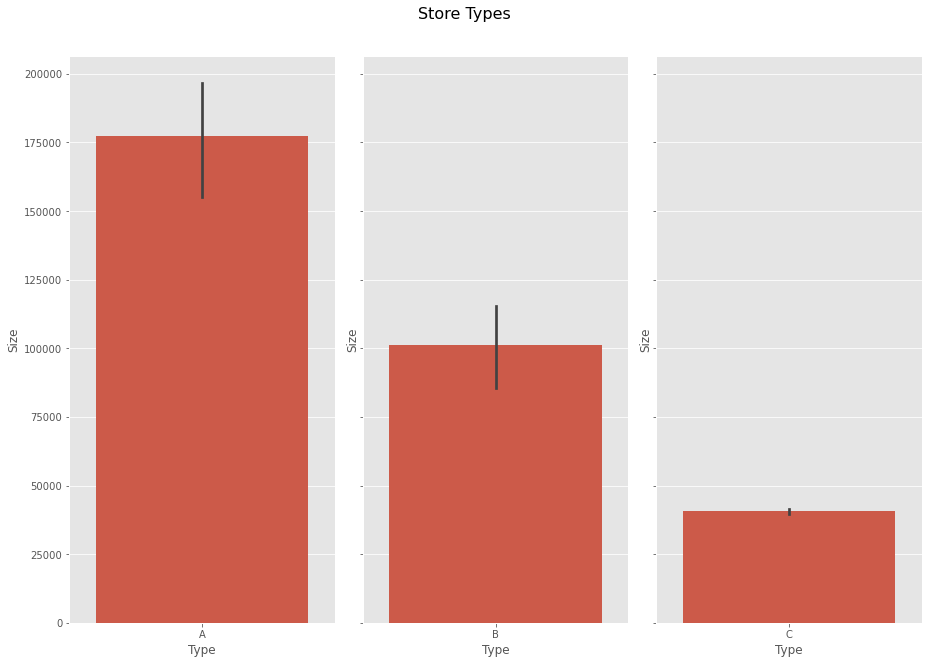

In [7]:
# Create 1x3 subplots.
fig, [ax1, ax2, ax3] = plt.subplots(1,3, sharey=True)
fig.suptitle("Store Types", y=1.02)

# Plot size for each store type.
sns.barplot(data=A, x=A.Type, y=A.Size, ax=ax1)
sns.barplot(data=B, x=B.Type, y=B.Size, ax=ax2)
sns.barplot(data=C, x=C.Type, y=C.Size, ax=ax3)

# Clean up whitespace padding.
fig.tight_layout()

# Display plots.
plt.show()

The above shows that the biggest stores are Type A, then Type B and the smallest of Type C. 

<br>

#### Train.

In [8]:
# Load the train.csv without an index.
train = pd.read_csv("Walmart Data Set/train.csv", index_col = False)

# Display the dafaframe
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


<br>

#### Test.

In [9]:
# Load the test.csv without an index.
test = pd.read_csv("Walmart Data Set/test.csv", index_col = False)

# Display the dafaframe
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


<br>

#### Features.

In [10]:
# Load the features.csv without an index.
features = pd.read_csv("Walmart Data Set/features.csv", index_col = False)

# Display the dafaframe
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


that has sales data for 98 products across 45 stores. The dataset contains sales per store, per department on weekly basis. The challenging aspect of working with the Walmart dataset is that it contains selected markdown events that affect sales and should be taken into consideration. 